In [2]:
import sys
import pymongo
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

In [76]:
connection = pymongo.MongoClient('localhost',27017)
db = connection.RealEstate
adverts = db.Adverts

In [77]:
cursor = adverts.find({},{'_id':0, 'Id':1, 'Price':1, 'Location':1, 'NumberOfRooms':1, 'Age':1, 'LivingAreaM2':1})
adverts_fields = ['id']
df = pd.DataFrame(list(cursor), columns = adverts_fields)

In [104]:
df = pd.DataFrame(list(adverts.find()))
df.fillna(0, inplace=True)
df[['LandAreaM2', 'LivingAreaM2', 'NumberOfRooms']] = df[['LandAreaM2', 'LivingAreaM2', 'NumberOfRooms']].astype(int)

df['LastPrice'] = 0
for index in range(len(df['Price'])):
    str_price = str(df['Price'][index][0])
    #print("Index: " + str(index))
    str_price = str_price.replace(' ', '')
    df['LastPrice'][index] = int(str_price)

df['LastPrice'] = df['LastPrice'].astype(int)

/home/scapogo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
df.head()

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,_id,LastPrice
0,Old,Senica,2243252,0,16.12.2016,http://www.nehnutelnosti.sk/2243252/zlava-5000...,90,0,[55 000],0,5856c9391d41c812d959e70a,55000
1,CompletelyRenewed,Senica,2627679,0,16.12.2016,http://www.nehnutelnosti.sk/2627679/na-predaj-...,66,2,[56 500],0,5856c9391d41c812d959e70b,56500
2,Old,Senica,2383041,1634,18.12.2016,http://www.nehnutelnosti.sk/2383041/na-predaj-...,225,0,[80 000],Čáčovská cesta 287,5856c9391d41c812d959e70c,80000
3,Old,Senica,2660987,675,18.12.2016,http://www.nehnutelnosti.sk/2660987/rodinny-do...,985,0,[50 000],Železničná 355/136,5856c9391d41c812d959e70d,50000
4,Old,Senica,1327449,30,18.12.2016,http://www.nehnutelnosti.sk/1327449/2-garaze-s...,30,0,[27 000],Čáčov,5856c9391d41c812d959e70e,27000


In [93]:
df.dtypes

Age              object
City             object
Id               object
LandAreaM2        int64
LastUpdate       object
Link             object
LivingAreaM2      int64
NumberOfRooms     int64
Price            object
Street           object
_id              object
LastPrice         int64
dtype: object

In [94]:
df.describe()

,LandAreaM2,LivingAreaM2,NumberOfRooms,LastPrice
count,193.000000,193.000000,193.000000,193.000000
mean,833.471503,395.461140,1.170984,68964.606218
std,4373.097848,2429.823165,1.424045,91934.912235
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,29000.000000
50%,0.000000,67.000000,0.000000,54600.000000
75%,301.000000,109.000000,3.000000,75000.000000
max,34966.000000,32280.000000,5.000000,811200.000000


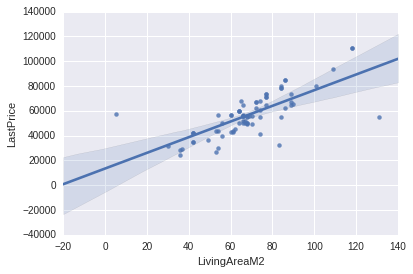

In [114]:
sns.regplot('LivingAreaM2', 'LastPrice', df[(df['NumberOfRooms']>0) & (df['LivingAreaM2']>0)])

In [83]:
df[(df['LivingAreaM2']==0) & (df['NumberOfRooms']>0)]

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,_id,LastPrice
7,New,Senica,2644435,0,18.12.2016,http://www.nehnutelnosti.sk/2644435/1-izbovy-b...,0,1,[40 635],Robotnícka,5856c9391d41c812d959e711,40635
165,CompletelyRenewed,Senica,2543486,0,19.09.2016,http://www.nehnutelnosti.sk/2543486/byt-3-1-so...,0,3,[65 000],Sotiná,5856c9d01d41c8130782f44e,0
171,Old,Senica,2577641,0,27.09.2016,http://www.nehnutelnosti.sk/2577641/senica-cen...,0,4,[54 600],0,5856c9d01d41c8130782f454,0
174,PartiallyRenewed,Senica,2585423,0,04.10.2016,http://www.nehnutelnosti.sk/2585423/pekny-zrek...,0,3,[64 900],Sotiná,5856c9d01d41c8130782f457,0


In [113]:
df = df[df['LastPrice']!=0]

In [112]:
df_new[df_new['LastPrice']==0]

,Age,City,Id,LandAreaM2,LastUpdate,Link,LivingAreaM2,NumberOfRooms,Price,Street,_id,LastPrice
